# Covid-19 Vaccine Allocations and Case Counts Analysis
----

Written in the Python 3.7.9 Environment

By Tarak Patel, Nicole Lund and Anne Niemiec.

Common Jupyter cells have been notated for ease of merging after individuals their analysis.

Individual working files will be merged using https://pypi.org/project/nbmerge/

In [38]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load Dependencies

# Data Organization & Collection
import pandas as pd
import requests
import json
from census import Census

# Data Visualization & Analysis
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import gmaps

# General Navigation
import time
import os
import sys

In [39]:
# Define users api key file folder location
api_key_path = r"C:\Users\nlund\Documents\GitHub\untracked_files"

In [40]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Add API key file to system path
# sys.path.append(api_key_path)

# # Import Census API Key
# from untracked_api_keys import census_key
# c = Census(census_key, year=2019)

# # Import Google API key
# from untracked_api_keys import g_key

In [41]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Case and Death Counts by state and time
    # This data combines:
        # United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'
        # state_code.csv

c_d_withstate_df_path = r"..\data_manipulation\clean_data\c_d_withstate_df.csv"
cases_deaths_df = pd.read_csv(c_d_withstate_df_path)
cases_deaths_df.head()

,state_name,state_code,date,day_num,total_cases,confirmed_cases,probable_cases,new_cases,pnew_cases,total_deaths,confirmed_deaths,probable_deaths,new_deaths,pnew_deaths,consent_cases,consent_deaths,created_at
0,Alaska,AK,12/14/2020,0,40160,0.0,0.0,422,0.0,175,0.0,0.0,0,0.0,0,0,12/15/2020 14:39
1,Alabama,AL,12/14/2020,0,297895,244762.0,53133.0,2264,332.0,4102,3624.0,478.0,0,0.0,Agree,Agree,12/15/2020 14:39
2,Arkansas,AR,12/14/2020,0,187057,0.0,0.0,1355,122.0,2990,0.0,0.0,45,22.0,Not agree,Not agree,12/15/2020 14:39
3,American Samoa,AS,12/14/2020,0,3,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,12/15/2020 14:39
4,Arizona,AZ,12/14/2020,0,420248,404294.0,15954.0,11806,503.0,7358,6782.0,576.0,1,-2.0,Agree,Agree,12/15/2020 14:39


In [42]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Vaccination Allocation Data by state and time
    # This data combines:
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Pfizer.csv
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna.csv
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Janssen.csv

Combined_Vaccine_df_path = r"..\data_manipulation\clean_data\Combined_Vaccine_df.csv"
vaccine_allocation_df = pd.read_csv(Combined_Vaccine_df_path)
vaccine_allocation_df.head()

,state_name,state_code,date,day_num,pfe_dose_1,pfe_dose_2,mrna_dose_1,mrna_dose_2,jnj_dose_1
0,Connecticut,CT,04/19/2021,126,54990,54990,40400.0,40400.0,0.0
1,Maine,ME,04/19/2021,126,21060,21060,15400.0,15400.0,0.0
2,Massachusetts,MA,04/19/2021,126,105300,105300,77700.0,77700.0,0.0
3,New Hampshire,NH,04/19/2021,126,21060,21060,15500.0,15500.0,0.0
4,Rhode Island,RI,04/19/2021,126,16380,16380,12100.0,12100.0,0.0


In [43]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for State Population from Census reports
    # This data collects census API request data by state:
        # Population.csv

Population_path = r"..\data_manipulation\clean_data\Population.csv"
census_df = pd.read_csv(Population_path)
census_df.head()

,state_name,state_code,population,median_age,household_income,per_capita_income,poverty_count,poverty_rate,unemployment_count,unemployment_rate
0,Alabama,AL,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,132095.0,2.708946
1,Alaska,AK,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,26808.0,3.637114
2,Arizona,AZ,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,195905.0,2.778676
3,Arkansas,AR,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,70481.0,2.349860
4,California,CA,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,1199233.0,3.052765


# Group 2 Analysis

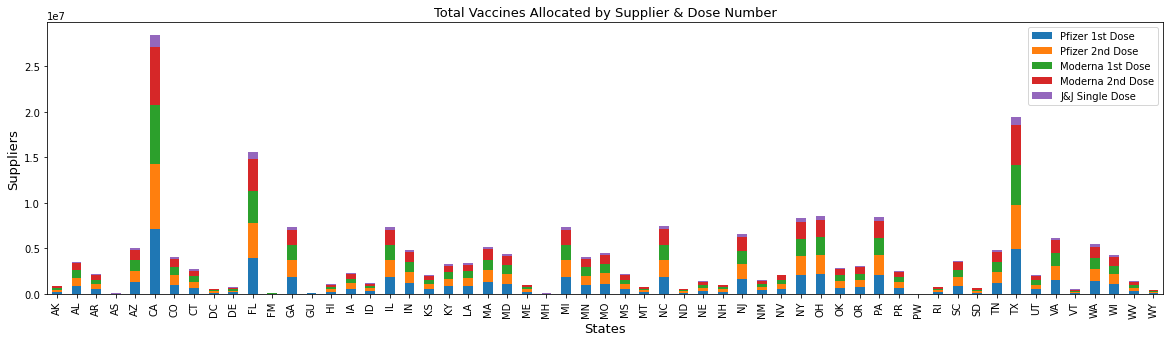

In [92]:
### Group 2 Charts authored by Anne Niemiec

#### Stacked Bar Plot showing Vaccine Allocations by State on latest date present in the data

# * x-axis = State

# * y-axis = 
#     * Bar 1: Pfizer cumulative 1st dose allocation
#     * Bar 2: Pfizer cumulative 2nd dose allocation
#     * Bar 3: Moderna cumulative 1st dose allocation
#     * Bar 4: Moderna cumulative 2nd dose allocation
#     * Bar 5: Johnson & Johnson cumulative single dose allocation

# rename dataframe and groupby specific columns
state_code_df=vaccine_allocation_df.groupby(["state_code"]).sum()
state_code_wo_day_num=state_code_df[["pfe_dose_1","pfe_dose_2","mrna_dose_1","mrna_dose_2","jnj_dose_1"]]

# plotting
state_code_wo_day_num.plot(kind='bar', figsize=(20,5),stacked=True)

# formatting labels, title, legend
plt.title("Total Vaccines Allocated by Supplier & Dose Number",fontsize=13)
plt.xlabel("States", fontsize=13)
plt.ylabel("Suppliers",fontsize=13)
legend=plt.legend()
legend.get_texts()[0].set_text('Pfizer 1st Dose')
legend.get_texts()[1].set_text('Pfizer 2nd Dose')
legend.get_texts()[2].set_text('Moderna 1st Dose')
legend.get_texts()[3].set_text('Moderna 2nd Dose')
legend.get_texts()[4].set_text('J&J Single Dose')
